In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-pac

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.5.3 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.10


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [4]:
#%matplotlib inline

In [5]:
writeDir = "write/"

fileName = "luadBischoff"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


In [6]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

read input file

In [7]:
inDir = 'data/LUAD/Data_Bischoff2021_Lung'
inputFileMtx = f'{inDir}/Exp_data_UMIcounts.mtx'
inputGenes = f'{inDir}/Genes.txt'
inputBarcodes = f'{inDir}/Cells.csv'
inMetaFile = f'{inDir}/Meta-data.csv'

In [8]:
adata = sc.read_mtx(inputFileMtx).T
adata

AnnData object with n_obs × n_vars = 120961 × 33514

In [9]:
genes = pd.read_csv(inputGenes, header=None,index_col=0)
genes.index.name = None
genes

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC233755.2
AC233755.1
AC240274.1
AC213203.1


In [10]:
cells = pd.read_table(inputBarcodes, index_col=0, sep=",")
#cells.index = [f"{cells.loc[i,'sample']}_{cells.loc[i,'cell_name']}" for i in range(len(cells))]
cells

,sample,patient,cell_type,cell_subtype,source,complexity
cell_name,,,,,,
AAACCCAAGACGACGT-1_1,p018_N,p018,NaN,NaN,Normal,519
AAACCCAAGCACTCTA-1_2,p018_N,p018,Macrophage,Alveolar_Macrophages1,Normal,618
AAACCCAAGCTGAAGC-1_3,p018_N,p018,Macrophage,Alveolar_Macrophages1,Normal,660
AAACCCACAACTTGGT-1_4,p018_N,p018,Macrophage,Alveolar_Macrophages1,Normal,843
AAACCCACAAGAATAC-1_5,p018_N,p018,Macrophage,Alveolar_Macrophages1,Normal,1060
...,...,...,...,...,...,...
TTTGGTTAGAGTGTTA-1_120957,p034_T,p034,Macrophage,CD14_Macrophages2,Tumor,5310
TTTGGTTGTCCCTCAT-1_120958,p034_T,p034,T_cell,T_CD8_1,Tumor,1648
TTTGTTGCAGTAGAAT-1_120959,p034_T,p034,T_cell,T_CD8_1,Tumor,1801


In [11]:
meta = pd.read_table(inMetaFile,index_col=0, sep=",")
meta

,patient,source,n_cells,technology,cancer_type
sample,,,,,
p018_N,p018,Normal,11173,10x,Lung Adenocarcinoma
p018_T,p018,Tumor,13248,10x,Lung Adenocarcinoma
p019_N,p019,Normal,1084,10x,Lung Adenocarcinoma
p019_T,p019,Tumor,1368,10x,Lung Adenocarcinoma
p023_T,p023,Tumor,7199,10x,Lung Adenocarcinoma
p024_T,p024,Tumor,6375,10x,Lung Adenocarcinoma
p027_N,p027,Normal,8520,10x,Lung Adenocarcinoma
p027_T,p027,Tumor,8713,10x,Lung Adenocarcinoma
p028_N,p028,Normal,6157,10x,Lung Adenocarcinoma


In [12]:
adata.obs = cells
adata.var = genes

In [13]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [14]:
adata.obs 

,sample,patient,cell_type,cell_subtype,source,complexity
cell_name,,,,,,
AAACCCAAGACGACGT-1_1,p018_N,p018,NaN,NaN,Normal,519
AAACCCAAGCACTCTA-1_2,p018_N,p018,Macrophage,Alveolar_Macrophages1,Normal,618
AAACCCAAGCTGAAGC-1_3,p018_N,p018,Macrophage,Alveolar_Macrophages1,Normal,660
AAACCCACAACTTGGT-1_4,p018_N,p018,Macrophage,Alveolar_Macrophages1,Normal,843
AAACCCACAAGAATAC-1_5,p018_N,p018,Macrophage,Alveolar_Macrophages1,Normal,1060
...,...,...,...,...,...,...
TTTGGTTAGAGTGTTA-1_120957,p034_T,p034,Macrophage,CD14_Macrophages2,Tumor,5310
TTTGGTTGTCCCTCAT-1_120958,p034_T,p034,T_cell,T_CD8_1,Tumor,1648
TTTGTTGCAGTAGAAT-1_120959,p034_T,p034,T_cell,T_CD8_1,Tumor,1801


In [15]:
adata.var

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC233755.2
AC233755.1
AC240274.1
AC213203.1


In [16]:
adata

AnnData object with n_obs × n_vars = 120961 × 33514
    obs: 'sample', 'patient', 'cell_type', 'cell_subtype', 'source', 'complexity'

In [18]:
#metaInterest = [ 'source']
#meta = meta[metaInterest]

In [19]:
#addMeta = pd.DataFrame([meta.loc[samp].values for samp in adata.obs["sample"]], columns = metaInterest, index = adata.obs.index)
#adata.obs = adata.obs.join(addMeta)

# Start QC
investigate highest expressed genes

normalizing counts per cell
    finished (0:00:01)


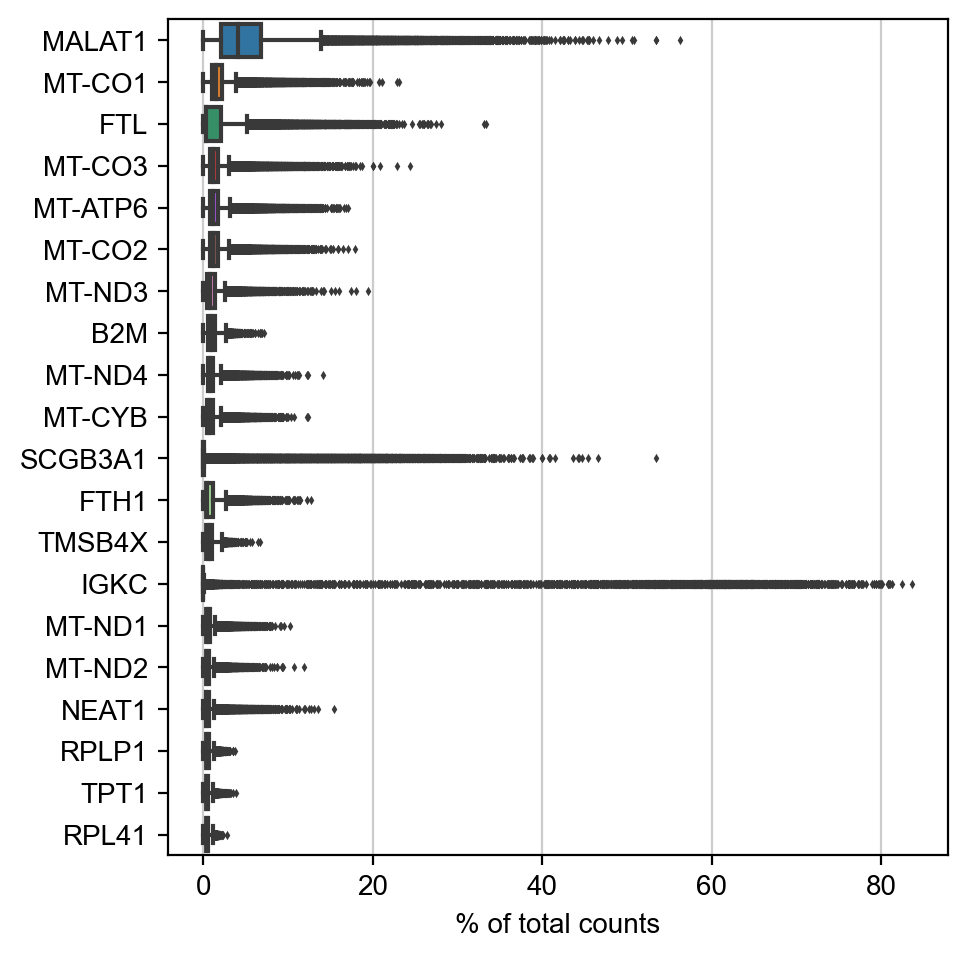

In [20]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/var/folders/nc/t9t85q_94q7g4tf0gz83qts40000gn/T/ipykernel_86665/520841752.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


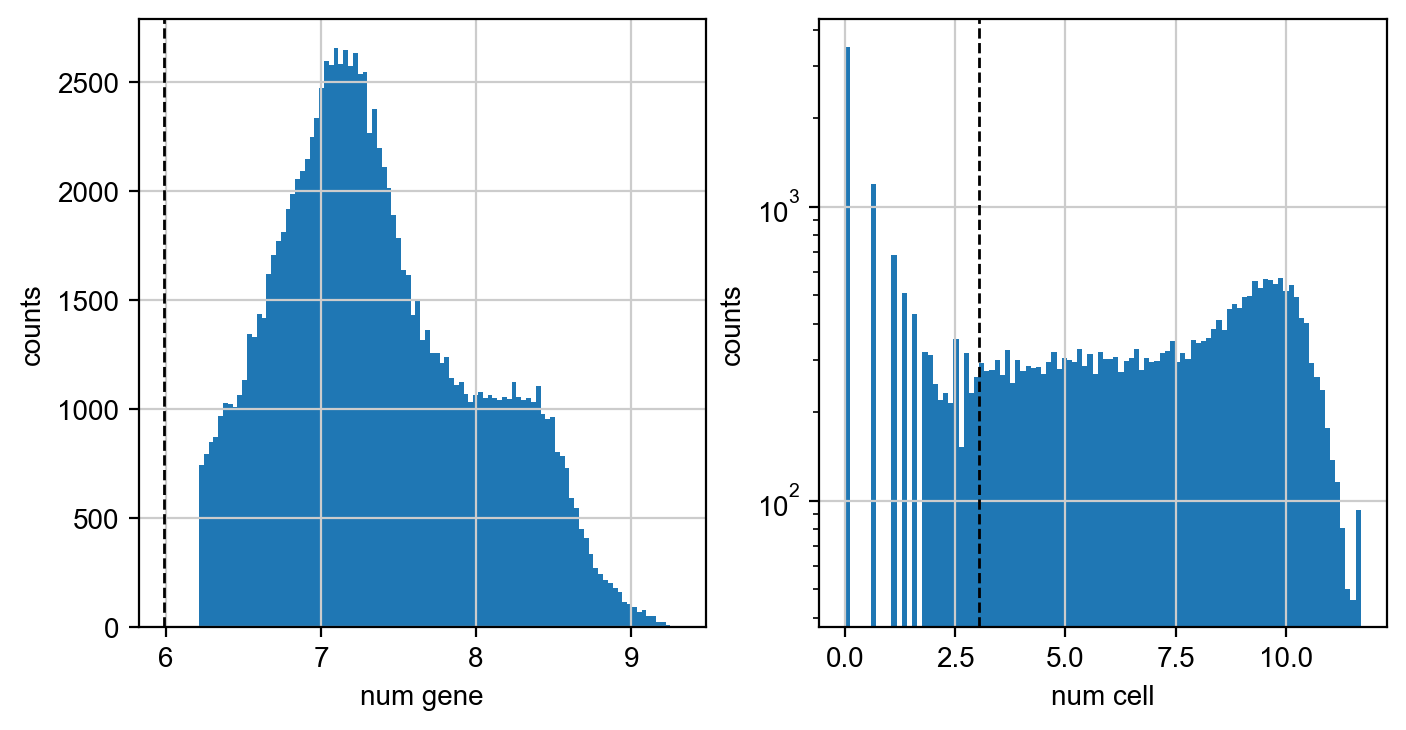

In [21]:
valX = adata.X>0
minGenes=400
minCells=20

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [22]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 9169 genes that are detected in less than 20 cells


In [23]:
adata = adata[:,np.logical_not(adata.var_names=="MALAT1")]

## Mito QC

In [24]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], log1p = False, inplace=True)

/var/folders/nc/t9t85q_94q7g4tf0gz83qts40000gn/T/ipykernel_86665/2933791377.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('MT-')


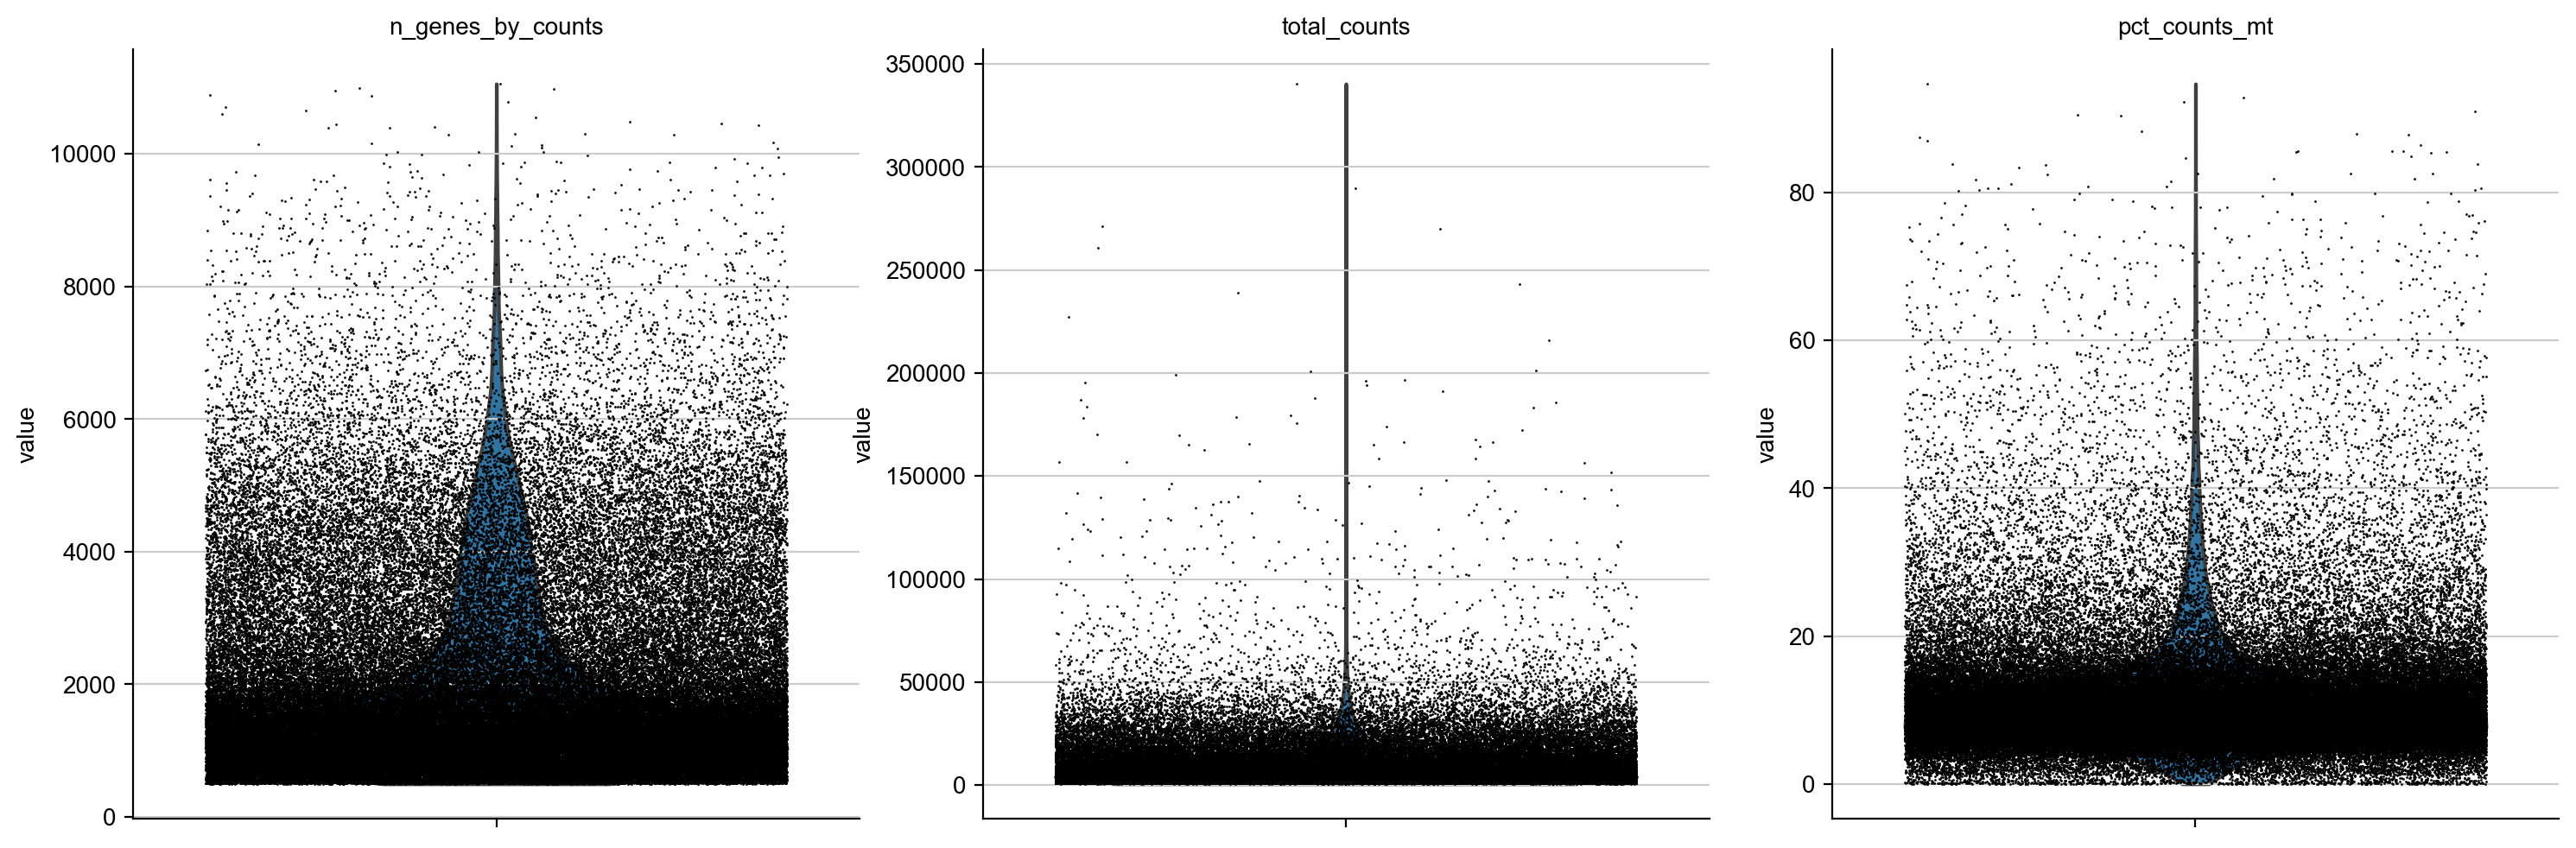

In [25]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

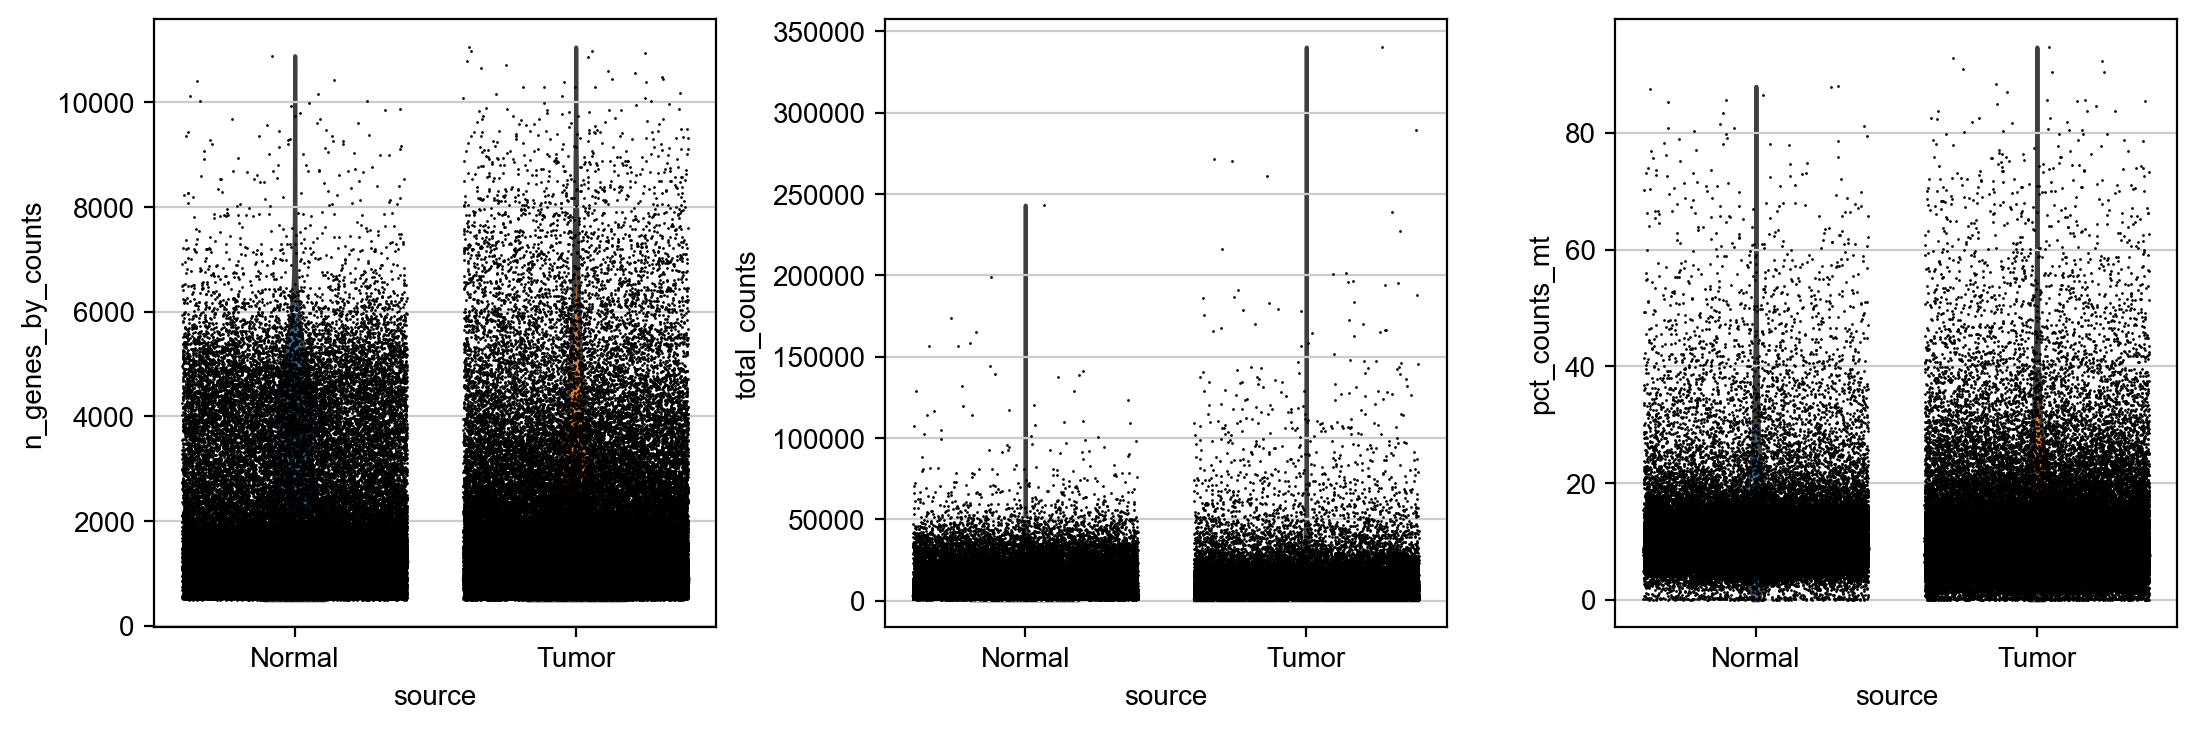

In [26]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True, groupby="source")

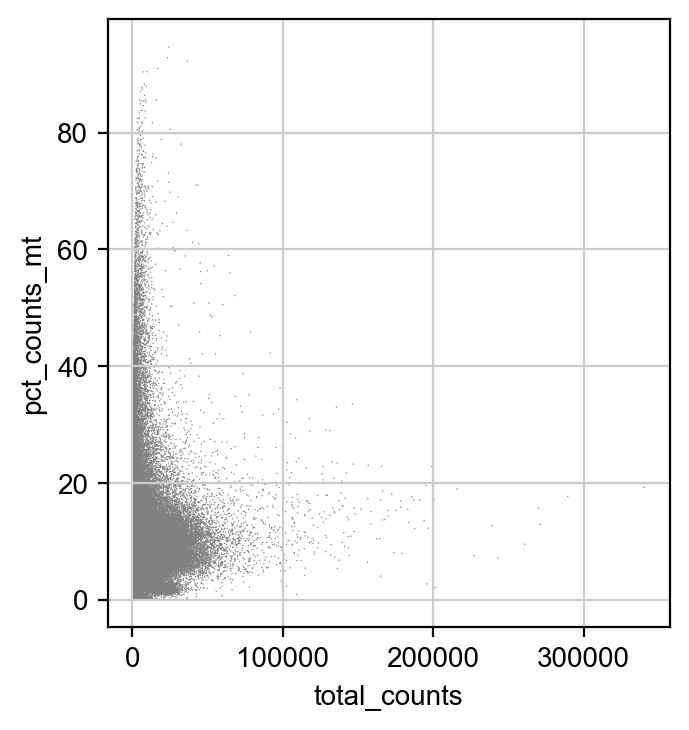

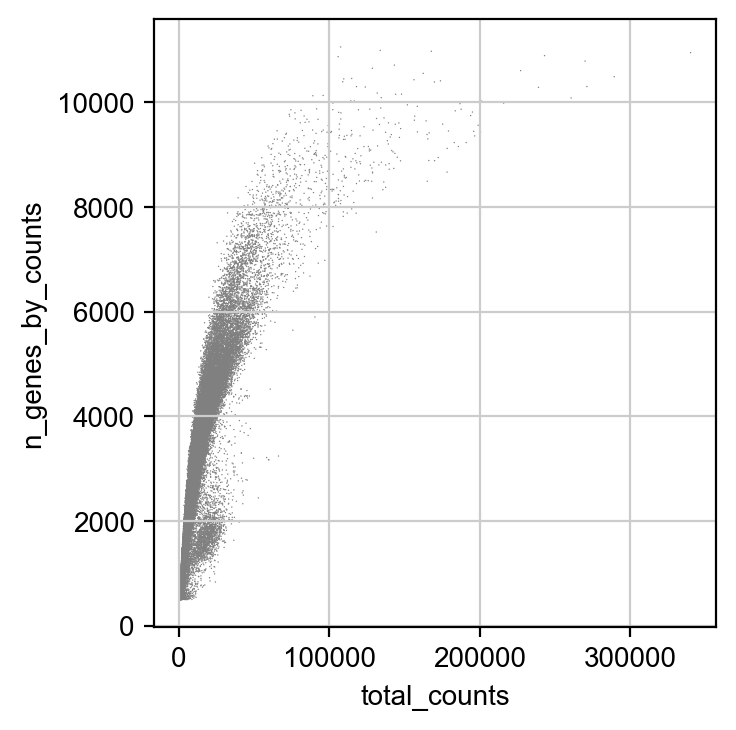

In [27]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [39]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.total_counts < 40000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]
adata = adata[adata.obs.pct_counts_mt > 2.5, :]

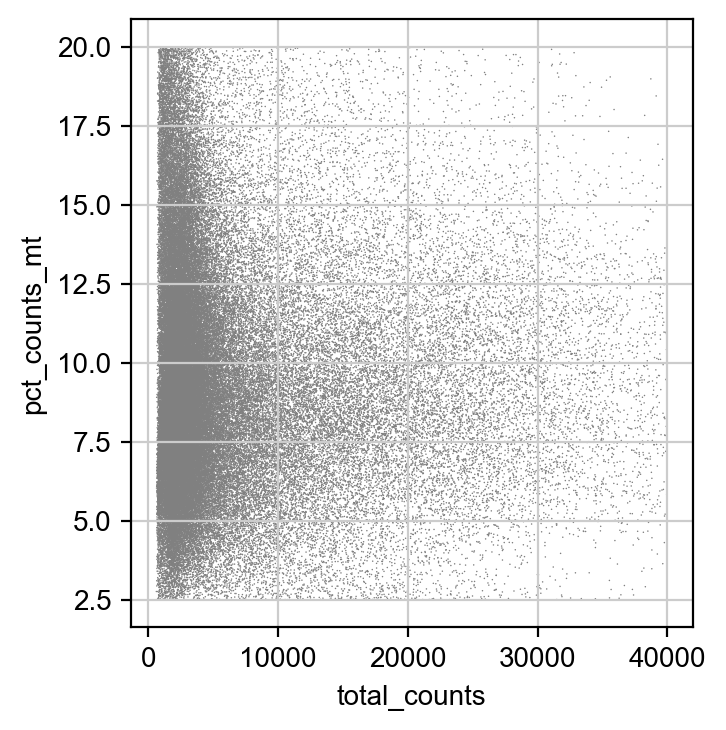

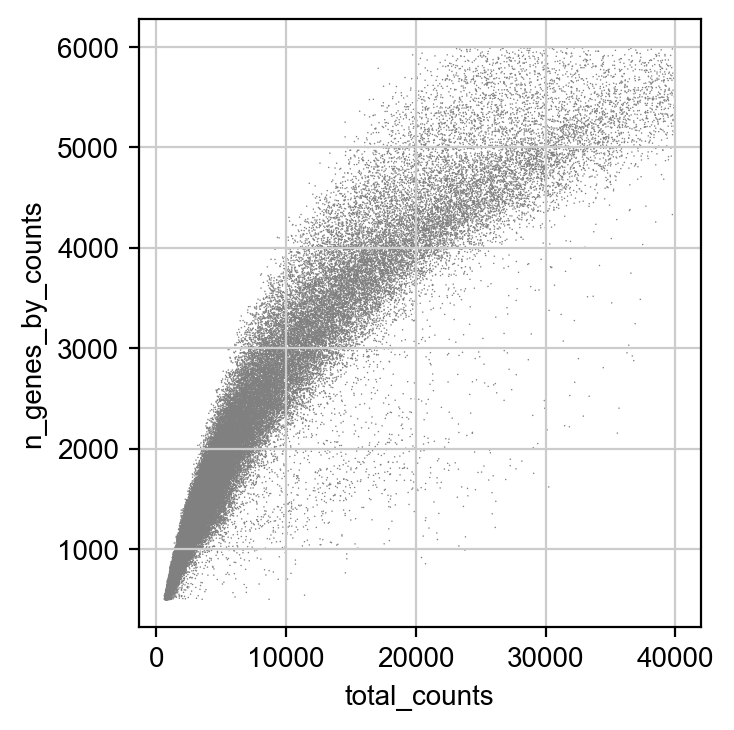

In [40]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

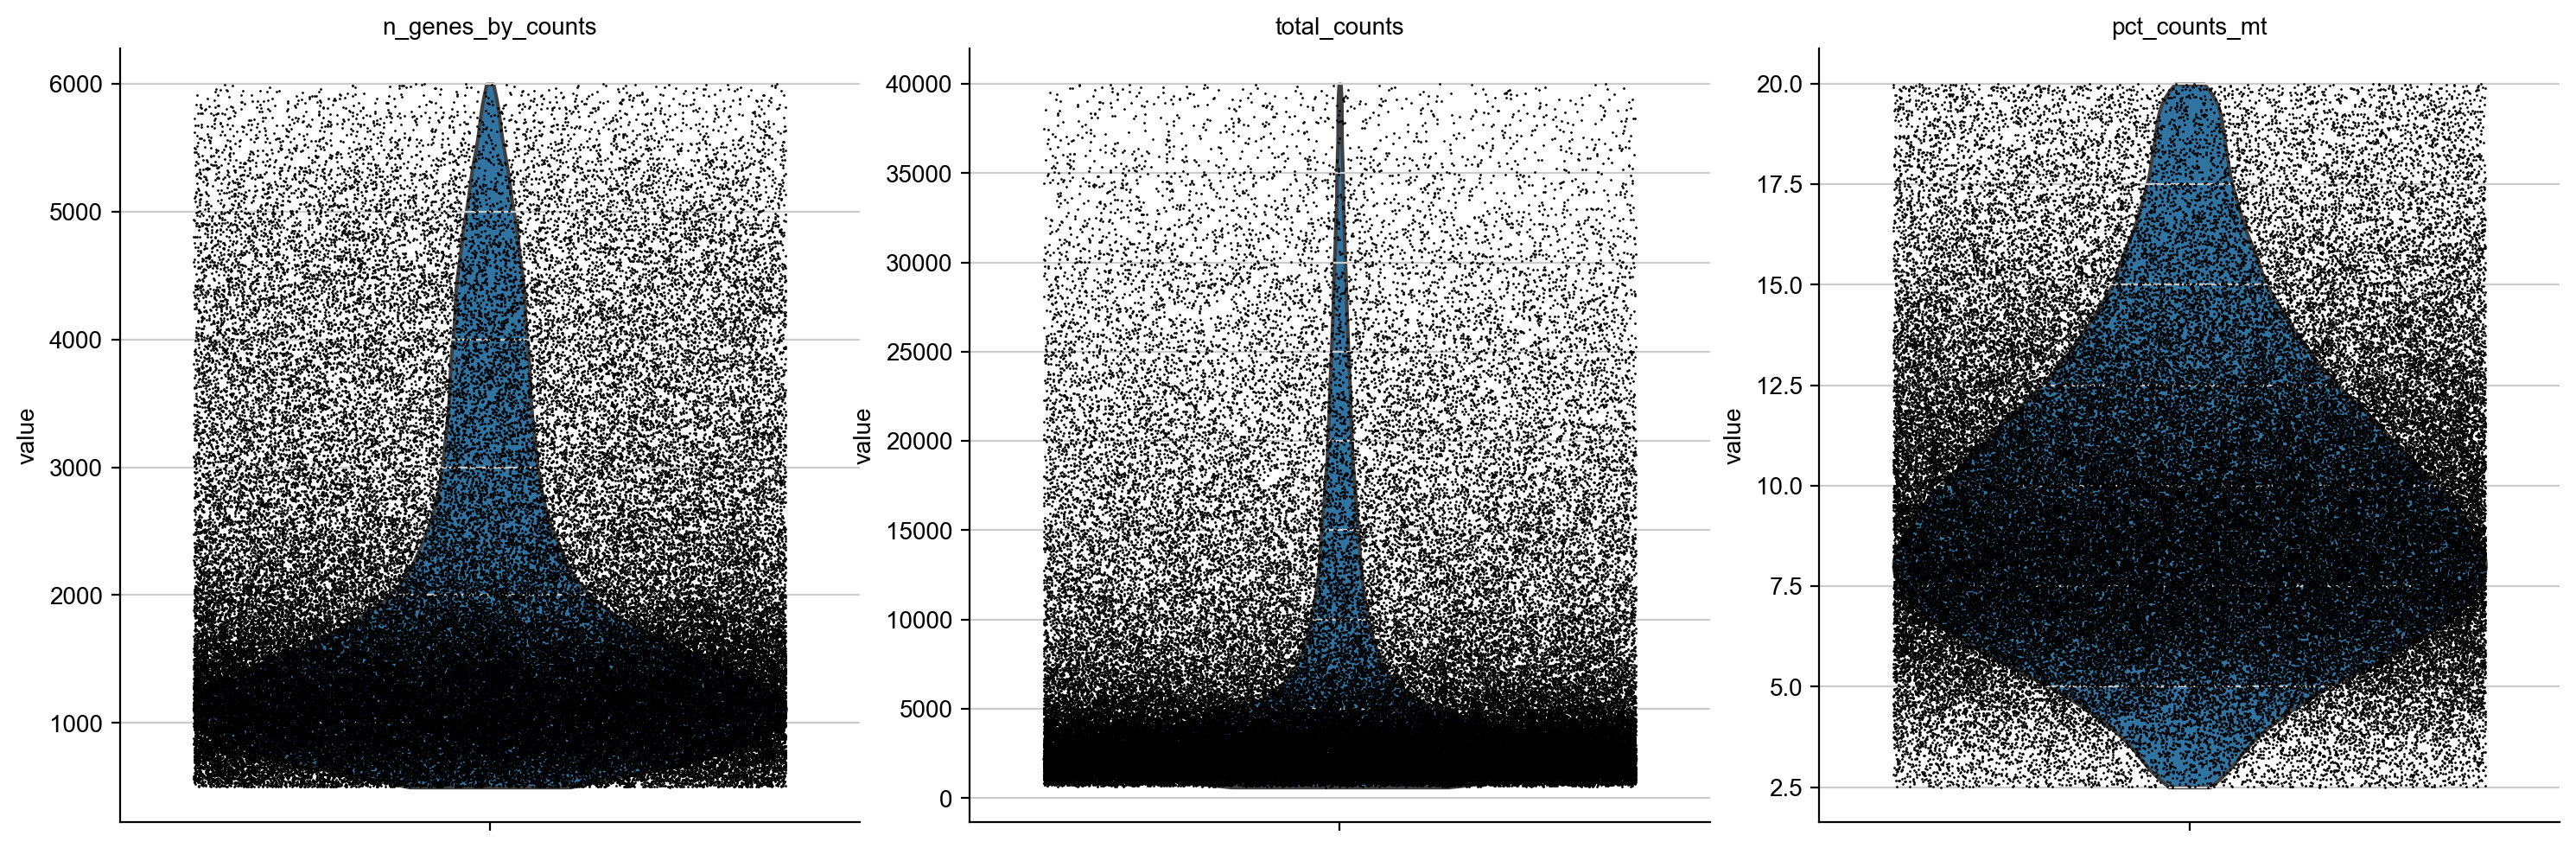

In [41]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

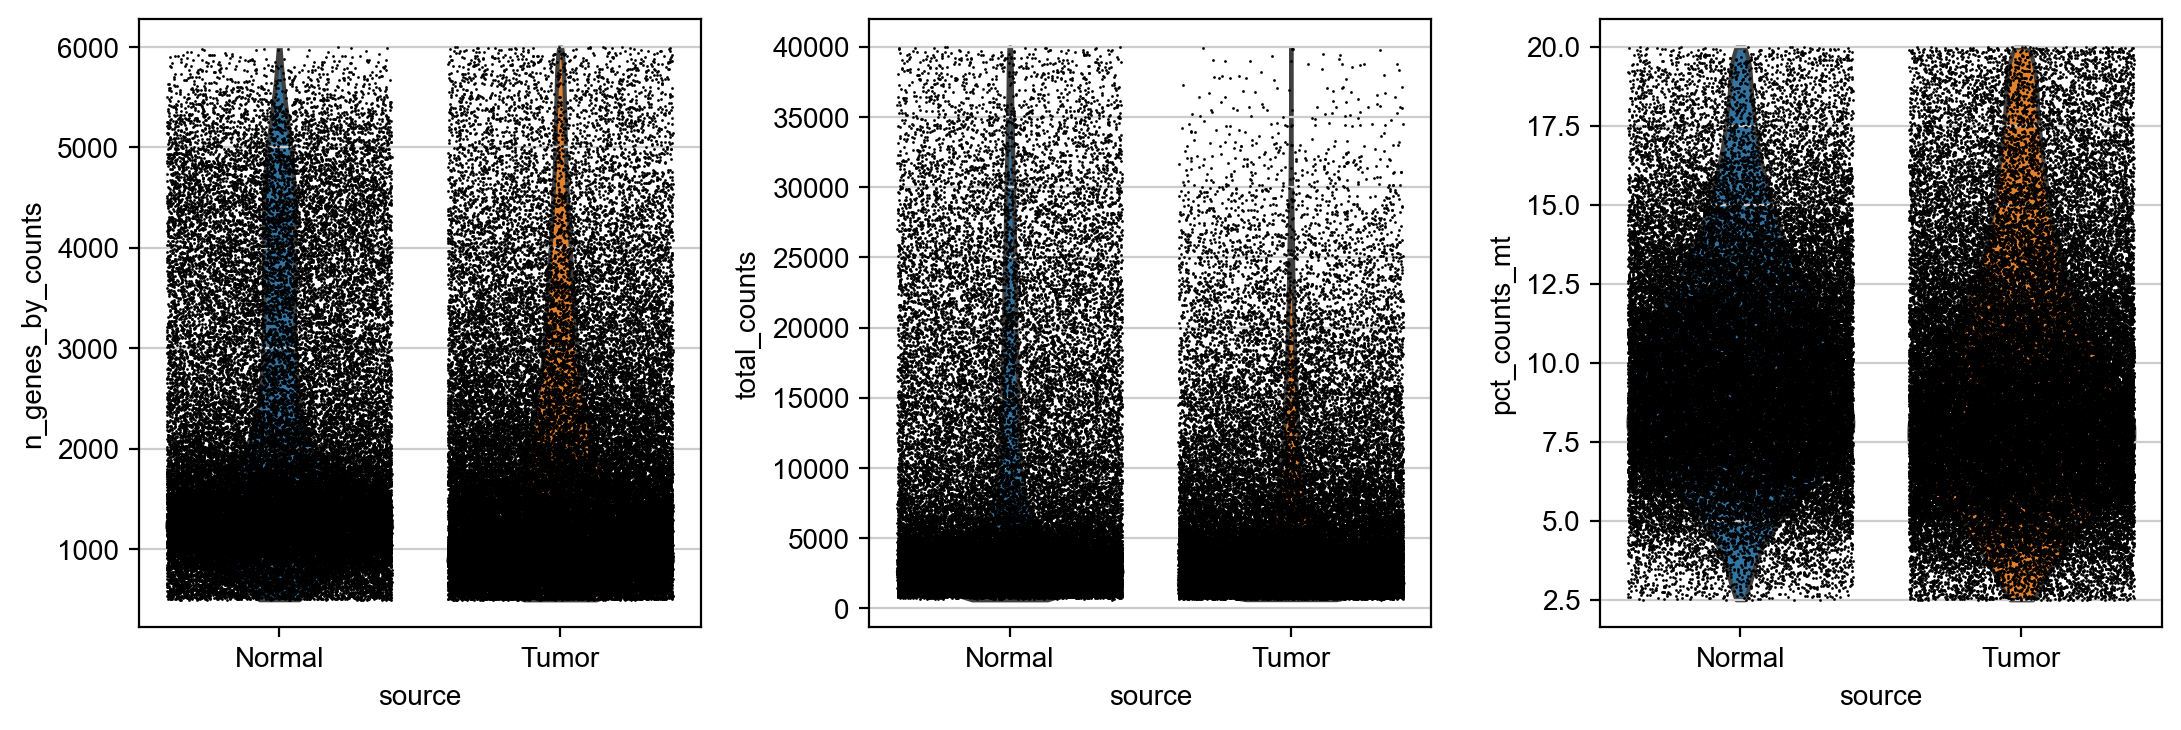

In [42]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True, groupby="source")

save post QC scanpy

In [43]:
adata

View of AnnData object with n_obs × n_vars = 103696 × 24344
    obs: 'sample', 'patient', 'cell_type', 'cell_subtype', 'source', 'complexity', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'source_colors'

In [45]:
resultsFileQC

'write/luadBischoff_QC.h5ad'

In [46]:
adata.write(resultsFileQC)